Name: Pal Pokharna

---
PRN: 1032210766

---
Performed on 22/02/2024

---
EXP 5

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow
from google.colab.patches import cv2_imshow

In [10]:
img1=cv2.imread('m1.jpg')
img2=cv2.imread('m2.jpg')

In [3]:
img1

In [4]:
img2

In [11]:
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [12]:
img1 #check arrays to verify if its converted to grayscale

array([[63, 65, 65, ..., 73, 75, 76],
       [59, 60, 61, ..., 78, 80, 82],
       [65, 64, 63, ..., 78, 80, 82],
       ...,
       [70, 71, 67, ..., 78, 82, 85],
       [73, 71, 68, ..., 78, 82, 85],
       [75, 73, 69, ..., 83, 86, 88]], dtype=uint8)

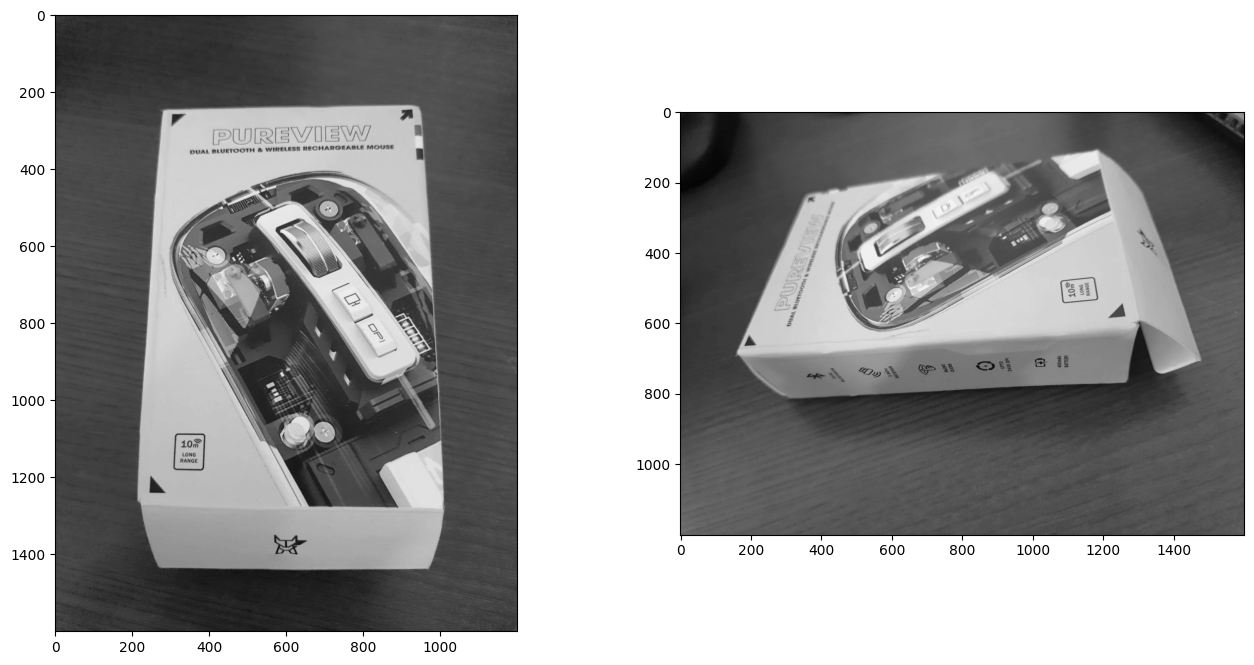

In [14]:
figure, ax=plt.subplots(1,2, figsize=(16,8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [15]:
sift=cv2.xfeatures2d.SIFT_create()

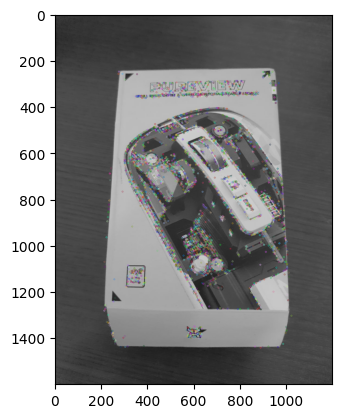

In [16]:
keypoints_1, descriptors_1=sift.detectAndCompute(img1,None)
image1=cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(image1)

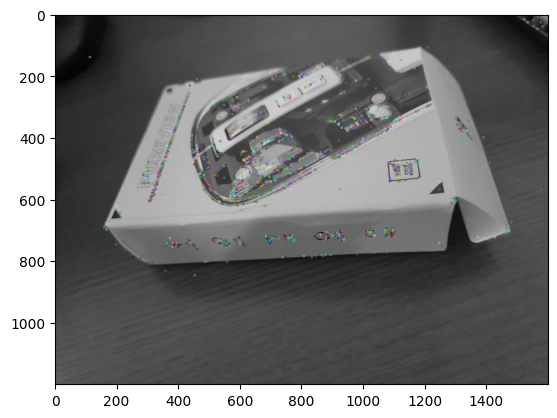

In [17]:
keypoints_2, descriptors_2=sift.detectAndCompute(img2,None)
image2=cv2.drawKeypoints(img2,keypoints_2,img2)
plt.imshow(image2)

In [18]:
len(keypoints_1), len(keypoints_2)

(3578, 1576)

In [19]:
# Feature Matching
bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches=bf.match(descriptors_1, descriptors_2)

In [20]:
matches=sorted(matches, key=lambda x:x.distance)

In [21]:
len(matches)

719

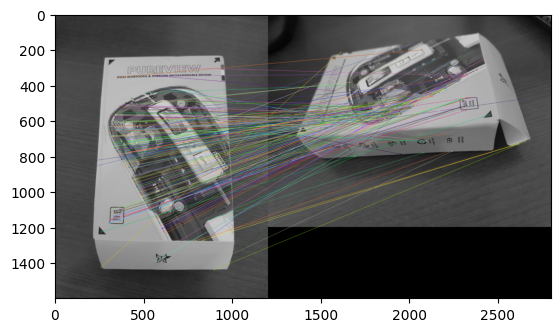

In [22]:
img3=cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:200], img2, flags=2)
plt.imshow(img3)

In [23]:
#extract matched keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2) #this extracts x,y coordinates of keypoints for img1
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [24]:
# Perform perspective transformation
M,_=cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [32]:
#Apply perspective transformation on first image
registered_image=cv2.warpPerspective(image1, M, dsize=(image2.shape[1], image2.shape[0]))  #img1 is getting transformed to be like 2

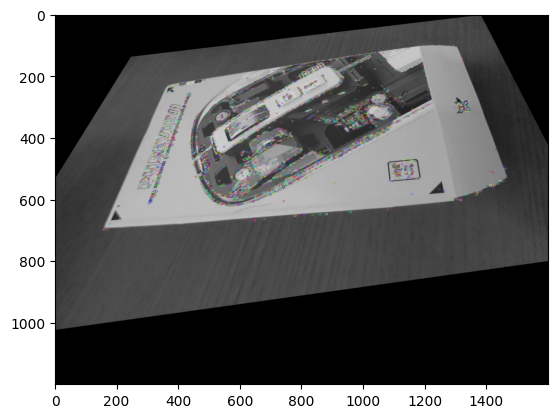

In [33]:
#display registered image
plt.imshow(registered_image)

Text(0.5, 1.0, 'Registered Image')

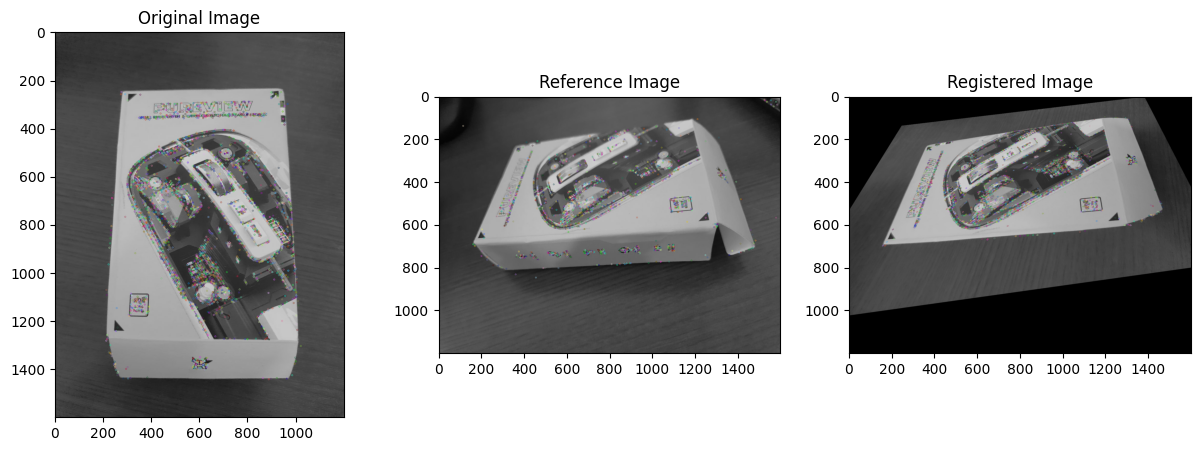

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 3, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('Registered Image')